In [1]:
from PIL import Image
from krwordrank.word import KRWordRank
from krwordrank.hangle import normalize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from krwordrank.word import KRWordRank
from krwordrank.word import summarize_with_keywords
from krwordrank.sentence import summarize_with_sentences

# 2030 데이터로 키워드 추출

In [2]:
df = pd.read_csv('data/data2030_전처리_좋아요가중치_텍스트전처리.csv', index_col=0)
df

,Date,ID,Comment,Comment_date,Channel,Like,Dislike,Comment_like,Weighted_comment,Comment_textPreprocessing
Title,,,,,,,,,,
#139​ 민주당 지도부가 2030 마음을 얻으려면...,2021-04-08,샤인디케이,"내리막이 있으면 다시 오르막이 있는 법, 예방주사라 생각하고 힘들 냅시다.",2021-04-10,박시영TV,6400.0,83.0,48.0,"['내리막이 있으면 다시 오르막이 있는 법, 예방주사라 생각하고 힘들 냅시다.', ...","내리막이 있으면 다시 오르막이 있는 법, 예방주사라 생각하고 힘들 냅시다."
#139​ 민주당 지도부가 2030 마음을 얻으려면...,2021-04-08,문동렬,2030마음을 얻으려면 조언을 2030을 모셔다가 들어보는 성의를 보여야 됩니다. ...,2021-04-10,박시영TV,6400.0,83.0,37.0,['2030마음을 얻으려면 조언을 2030을 모셔다가 들어보는 성의를 보여야 됩니다...,2030 마음을 얻으려면 조언을 2030을 모셔다가 들어보는 성의를 보여야 합니다....
#139​ 민주당 지도부가 2030 마음을 얻으려면...,2021-04-08,135 swan,전 군대 전역 전까지는 보수를 지지했지만 대학에서 양극화에 관심을 가지면서 진보로 ...,2021-04-10,박시영TV,6400.0,83.0,34.0,['전 군대 전역 전까지는 보수를 지지했지만 대학에서 양극화에 관심을 가지면서 진보...,"전 군대 전역 전까지는 보수를 지지했지만, 대학에서 양극화에 관심을 가지면서 진보로..."
#139​ 민주당 지도부가 2030 마음을 얻으려면...,2021-04-08,미루,몸 안에서 무엇인가 무너져 내린 기분..그래도 힘내고 가야죠민주당은 뼈아픈 진단 새...,2021-04-10,박시영TV,6400.0,83.0,67.0,['몸 안에서 무엇인가 무너져 내린 기분..그래도 힘내고 가야죠민주당은 뼈아픈 진단...,몸 안에서 무엇인가 무너져 내린 기분.. 그래도 힘내고 가야죠. 민주당은 뼈아픈 진...
#139​ 민주당 지도부가 2030 마음을 얻으려면...,2021-04-08,단아란,네 죄송합니다. 삭제하겠습니다,2021-04-10,박시영TV,6400.0,83.0,34.0,"['네 죄송합니다. 삭제하겠습니다', '네 죄송합니다. 삭제하겠습니다', '네 죄송...",네 죄송합니다. 삭제하겠습니다
...,...,...,...,...,...,...,...,...,...,...
"[정치 맞수다] 대선가도 들어선 여·야의 서로 다른 잡음, 20대 남자 투표성향에 대한 여·야의 분석 (2021.04.12/뉴스외전/MBC)",2021-04-11,유창준,"간교한 인간성을 가진, 김종인, 안띨수를 섬기느니.. 죽는게 났다.",2021-04-17,MBCNEWS,615.0,88.0,1.0,"간교한 인간성을 가진, 김종인, 안띨수를 섬기느니.. 죽는게 났다.","간교한 인간성을 가진, 김종인, 안 띨 수를 섬기느니.. 죽는 게 낫다."
"[정치 맞수다] 대선가도 들어선 여·야의 서로 다른 잡음, 20대 남자 투표성향에 대한 여·야의 분석 (2021.04.12/뉴스외전/MBC)",2021-04-11,유정순,이준석 정치연륜이 뭐가있다고 이렇게 나와서 이야기를 많이 하고 다니나,2021-04-17,MBCNEWS,615.0,88.0,0.0,이준석 정치연륜이 뭐가있다고 이렇게 나와서 이야기를 많이 하고 다니나,이준석 정치 연륜이 뭐가 있다고 이렇게 나와서 이야기를 많이 하고 다니나?
"[정치 맞수다] 대선가도 들어선 여·야의 서로 다른 잡음, 20대 남자 투표성향에 대한 여·야의 분석 (2021.04.12/뉴스외전/MBC)",2021-04-11,Hannah Kim,준석아 주댕이 조심해라.안철수가 할말이 옳다. 단일화 못햇우면 오세훈 승라없엇다. ...,2021-04-17,MBCNEWS,615.0,88.0,0.0,준석아 주댕이 조심해라.안철수가 할말이 옳다. 단일화 못햇우면 오세훈 승라없엇다. ...,준석아 주둥이 조심해라. 안철수가 할 말이 옳다. 단일화 못 했으면 오세훈 승리 없...


In [3]:
# 2030이 Title 또는 Comment_textPreprocessing에 있는 경우만 추출
df = df[['Comment']].reset_index(level=['Title'])\
.query('Title.str.contains("20")  or Comment.str.contains("30")',engine='python')
df

,Title,Comment
0,#139​ 민주당 지도부가 2030 마음을 얻으려면...,"내리막이 있으면 다시 오르막이 있는 법, 예방주사라 생각하고 힘들 냅시다."
1,#139​ 민주당 지도부가 2030 마음을 얻으려면...,2030마음을 얻으려면 조언을 2030을 모셔다가 들어보는 성의를 보여야 됩니다. ...
2,#139​ 민주당 지도부가 2030 마음을 얻으려면...,전 군대 전역 전까지는 보수를 지지했지만 대학에서 양극화에 관심을 가지면서 진보로 ...
3,#139​ 민주당 지도부가 2030 마음을 얻으려면...,몸 안에서 무엇인가 무너져 내린 기분..그래도 힘내고 가야죠민주당은 뼈아픈 진단 새...
4,#139​ 민주당 지도부가 2030 마음을 얻으려면...,네 죄송합니다. 삭제하겠습니다
...,...,...
56824,"[정치 맞수다] 대선가도 들어선 여·야의 서로 다른 잡음, 20대 남자 투표성향에 ...","간교한 인간성을 가진, 김종인, 안띨수를 섬기느니.. 죽는게 났다."
56825,"[정치 맞수다] 대선가도 들어선 여·야의 서로 다른 잡음, 20대 남자 투표성향에 ...",이준석 정치연륜이 뭐가있다고 이렇게 나와서 이야기를 많이 하고 다니나
56826,"[정치 맞수다] 대선가도 들어선 여·야의 서로 다른 잡음, 20대 남자 투표성향에 ...",준석아 주댕이 조심해라.안철수가 할말이 옳다. 단일화 못햇우면 오세훈 승라없엇다. ...
56827,"[정치 맞수다] 대선가도 들어선 여·야의 서로 다른 잡음, 20대 남자 투표성향에 ...",김준석 아웃 밉상


In [4]:
# df에 null값이 있는 지 확인
df.isna().sum()

Title      0
Comment    0
dtype: int64

In [5]:
# df의 null값 제거
df.dropna(axis=0,inplace=True)

In [6]:
# 결측치 잘 제거되었는지 확인
df.isna().sum()

Title      0
Comment    0
dtype: int64

In [7]:
# [:574]부터 오류남 -> 이유&해결방안 찾기
texts = df['Comment'].tolist()
texts

['내리막이 있으면 다시 오르막이 있는 법, 예방주사라 생각하고 힘들 냅시다.',
 '2030마음을 얻으려면 조언을 2030을 모셔다가 들어보는 성의를 보여야 됩니다. 2030도 아닌사람들이 추측해서 2030의 마음을 이야기하는것 자체가 문제의식이 없는 것입니다. 아마추어라도 2030사람들을 몇번이라도 불러서 보여주며 실질적인 것을 들어보는 것이 좋다고 생각해요.',
 '전 군대 전역 전까지는 보수를 지지했지만 대학에서 양극화에 관심을 가지면서 진보로 돌아섰죠! 20대의 경우 성격이 너무나 다르기에 초중반을나눠서 공략해야 한다고 생각해요! 가령 20대 초반이 등록금 같은게 문제라면 중반은 취업 후반은 자산 형성처럼(20~30대고민 혼재)세세하게 고민하는 흔적들을 보여주는게 중요하다고 생각합니다...정당 색채가 엷을 때는 사소한 이유로 지지정당이 변하는 경우가 많으니...',
 '몸 안에서 무엇인가 무너져 내린 기분..그래도 힘내고 가야죠민주당은 뼈아픈 진단 새겨들어야 합니다황희두님 자주 함께해서 20-30대 남성들의 마음을 얻을 수 있는 방안도 모색해야 합니다.그리고 전국민 재난지원금 보편지급!!언론개혁!!',
 '네 죄송합니다. 삭제하겠습니다',
 '진짜 민주당 제대로 각성해서 대권 화끈하게 가져오자!!!!!',
 '당대표 후보들이 왜 그 모양이야? ㅠㅠ',
 "말씀하신대로 열심히 2030 관련된 정책내고 입안하는거 중요하죠. 근데 그거 못지않게 중요한게 '홍보'입니다! 우리 이러이런거 만들었어 알아봐죠!가 아니라 커뮤니티 대응팀 만들어서 홍보좀 하라구요..2030들 커뮤니티 중독처럼 진짜 많이 합니다. 청와대나 당이나 홍보마케팅 전문가좀 잘 들여와서 커뮤니티 공략해야합니다. 그래야 지지자들이 또 퍼날르고 하죠. 포탈만큼 중요해요. 유튜브 sns도 물론 적극 활용하구요. 제발 법안, 정책 홍보좀 확실하게...진정성 있는것도 좋은데 쇼도 필요할때 해야죠. 커뮤니티에 관심 가지라고 꼭 당에 말씀 해주시고 박대표님 보실수있게 추천좀 부탁드려요ㅠ",
 '20대한테 

In [8]:
texts

['내리막이 있으면 다시 오르막이 있는 법, 예방주사라 생각하고 힘들 냅시다.',
 '2030마음을 얻으려면 조언을 2030을 모셔다가 들어보는 성의를 보여야 됩니다. 2030도 아닌사람들이 추측해서 2030의 마음을 이야기하는것 자체가 문제의식이 없는 것입니다. 아마추어라도 2030사람들을 몇번이라도 불러서 보여주며 실질적인 것을 들어보는 것이 좋다고 생각해요.',
 '전 군대 전역 전까지는 보수를 지지했지만 대학에서 양극화에 관심을 가지면서 진보로 돌아섰죠! 20대의 경우 성격이 너무나 다르기에 초중반을나눠서 공략해야 한다고 생각해요! 가령 20대 초반이 등록금 같은게 문제라면 중반은 취업 후반은 자산 형성처럼(20~30대고민 혼재)세세하게 고민하는 흔적들을 보여주는게 중요하다고 생각합니다...정당 색채가 엷을 때는 사소한 이유로 지지정당이 변하는 경우가 많으니...',
 '몸 안에서 무엇인가 무너져 내린 기분..그래도 힘내고 가야죠민주당은 뼈아픈 진단 새겨들어야 합니다황희두님 자주 함께해서 20-30대 남성들의 마음을 얻을 수 있는 방안도 모색해야 합니다.그리고 전국민 재난지원금 보편지급!!언론개혁!!',
 '네 죄송합니다. 삭제하겠습니다',
 '진짜 민주당 제대로 각성해서 대권 화끈하게 가져오자!!!!!',
 '당대표 후보들이 왜 그 모양이야? ㅠㅠ',
 "말씀하신대로 열심히 2030 관련된 정책내고 입안하는거 중요하죠. 근데 그거 못지않게 중요한게 '홍보'입니다! 우리 이러이런거 만들었어 알아봐죠!가 아니라 커뮤니티 대응팀 만들어서 홍보좀 하라구요..2030들 커뮤니티 중독처럼 진짜 많이 합니다. 청와대나 당이나 홍보마케팅 전문가좀 잘 들여와서 커뮤니티 공략해야합니다. 그래야 지지자들이 또 퍼날르고 하죠. 포탈만큼 중요해요. 유튜브 sns도 물론 적극 활용하구요. 제발 법안, 정책 홍보좀 확실하게...진정성 있는것도 좋은데 쇼도 필요할때 해야죠. 커뮤니티에 관심 가지라고 꼭 당에 말씀 해주시고 박대표님 보실수있게 추천좀 부탁드려요ㅠ",
 '20대한테 

In [9]:
# 불용어 제거
with open('data/stopwords.txt') as fp :
    stopwords = fp.readlines()

stopwords = set([x.strip() for x in stopwords])

In [10]:
keywords = summarize_with_keywords(texts, min_count=5, max_length=10,
    beta=0.85, max_iter=10, stopwords=stopwords, verbose=True)
keywords = summarize_with_keywords(texts) # with default arguments

scan vocabs ... 
num vocabs = 80317
done = 9 Early stopped.


In [11]:
passwords = {word:score for word, score in sorted(
    keywords.items(), key=lambda x:-x[1])[:300] if not (word in stopwords)}
passwords

{'20대': 223.60878175794463,
 '페미': 108.53958857668579,
 '지금': 83.61471844960843,
 '여성': 81.05779820074574,
 '남성': 67.40889296595306,
 '남자': 65.22819487513767,
 '생각': 63.95973990116236,
 '국민': 61.79210448810285,
 '사람': 61.14625827812621,
 '지지': 56.10521375780701,
 '정치': 51.133456047504446,
 '나라': 45.905519567488255,
 '보수': 43.88671267495259,
 '많이': 37.47961244448897,
 '여자': 37.4419859966904,
 '진보': 35.884698506967034,
 '선거': 35.18616163621336,
 '투표': 34.95654025306633,
 '부동산': 34.25159243208084,
 '40대': 33.89123027505926,
 '정신': 32.10263110650922,
 '문제': 31.771285537715567,
 '사회': 31.094558848280343,
 '청년': 30.784933759319337,
 '세대': 29.108292015567127,
 '서울': 27.589403697206084,
 '정권': 26.887048590982232,
 '좋은': 25.870380896577405,
 '언론': 25.755872378703202,
 '정책': 25.750310655590688,
 '정부': 23.321863617631895,
 '대선': 22.77114034530675,
 '10': 22.54683773445606,
 '이유': 22.48199129068061,
 '30대': 22.375140200974403,
 '저는': 21.42908486980053,
 '위한': 20.87076829567881}

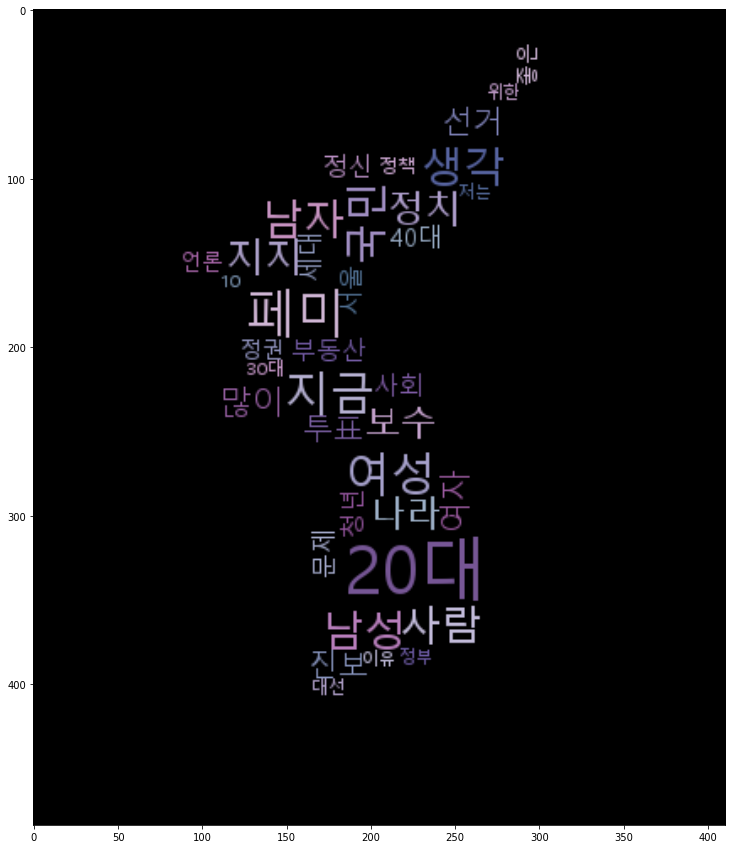

In [12]:
# 워드클라우드 색상 변경 함수 (리턴 위 : 보라색, 리턴 아래 : 회색 계열)
def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl({:d},{:d}%, {:d}%)".format(np.random.randint(212,313),np.random.randint(26,32),np.random.randint(45,80)))
    #return 'hsl(0, 0%%, %d%%)' % random.randint(60, 100)
    
# 폰트 패스 설정
font_path = "c:/Windows/Fonts/malgun.ttf"

# 바탕화면 지도 모양으로 만들기 위해 지도 이미지 들고오기
image_map = np.array(Image.open('data/map.png'))

krwordrank_cloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    mask=image_map,
    background_color="black",
    color_func = color_func
)

krwordrank_cloud = krwordrank_cloud.generate_from_frequencies(passwords)

fig = plt.figure(figsize=(15, 15))
plt.imshow(krwordrank_cloud, interpolation="bilinear")
plt.show()

# wordcloud 불용어 있으면 불용어 사전에 추가하기

In [13]:
# f = open("data/stopwords.txt",'a')
# for t in stopwords:
#     f.write(t+'\n')
# f.close()

In [14]:
# f = open("data/stopwords.txt",'a')
# f.write('그렇게\n')
# f.write('됩니다.\n')
# f.write('합니다.\n')
# f.write('것이\n')
# f.write('입니다.\n')
# f.write('있습니다.\n')
# f.write('이렇게.\n')
# f.write('한다.\n')
# f.write('겁니다.\n')
# f.write('민주당\n')
# f.write('오세훈\n')
# f.write('문재인\n')
# f.write('것을\n')
# f.write('이렇게\n')
# f.write('너무\n')
# f.write('가지고\n')
# f.write('ㅋㅋ\n')
# f.write('크크크\n')
# f.write('대한\n')
# f.write('근데\n')
# f.write('앞으로\n')
# f.write('이게\n')
# f.write('이미\n')
# f.write('내가\n')
# f.write('아직도\n')
# f.write('보고\n')
# f.close()

# 핵심 문장 추출

In [15]:
# 불용어 처리 O 버전
penalty = lambda x:0 if (25 <= len(x) <= 80) else 1 # 너무 길거나 짧은 문장 제거

stopwords = stopwords
num_keywords = 500
num_keysents = 2000

# 다양한 조건 추가 (불용어 처리 등등)
keywords, sents = summarize_with_sentences(
    texts,
    penalty=penalty,
    stopwords = stopwords,
    diversity=0.9,
    num_keywords=num_keywords,
    num_keysents=num_keysents,
    verbose=False
)
print(sents,keywords)
print(len(keywords))

['20대 남자들이 사회적 약자들을 혐오한다고 하셨는데 20대 남자들한테 욕을 먹는 기성세대 정치인들, 페미들이 정말 사회적 약자라고 생각하시나요?', '설득력 안떨어져.. 여성이든 남성이든 지지가 빠진건 정신온전한 사람들이 빠진거야. 당사자가 맞다는데 뭐가 아니라는거야..', 'ㅇㅇ정확하네 보수고 진보고 떠나서 페미랑 여가부 지지하면 그반대편 찍을거고  더듬어페미당은 일단 적폐임  내인생엔 투표안함', '지금이라도참회하니다행한국에청년들희망을깡그리문정권민주당바닥으로내팽겨쳐국민혈세써가면서누구때문에선거하는데오세훈님당선됩니다좋은기를팍팍', '선거는 후보자끼리 서로비방하고 공격하는것 보다 일반인이나 학생들이 냉정하게 오목조목 잘못된 부분을 말해주니 백프로 공감 화이팅 20대 최고', '솔직히 남자든 여자든 같은 같은 나이대의 인간들인데 표심이 차이난다는게 말이 되냐? 진짜 정책 실패다... 젠더갈등 책임져라 민주당은', '언론이 국힘당과 함께 선거운동 하고있으니  시민이 깨어있어야선거에 이깁니다민주시민여러분 흔들리지 말고끝까지  민주당을 응원하고 지지합시다', '단순히 보수가아니라 내가봐도 걍 세금 막 써대고 이상한 정책 펴면서 문제는 해결안되고 지들 잘못은 숨키는게 보이니까 그렇지', '샤이진보 말이 좋네  똑바로 말해라 다들 알고 있는 팩트를 말을 못하는거냐 모르는거냐?  어디하나 딱부러지게 말하는 놈이 없네', '강력한 개혁만이 답이다 언론 검찰 부동산아직도 민심을 몰라서 고심한다면 다음 대선도 패배할것이다 180석의 의미를 아직도 모르는가?', '너희가공산주의싫어서 살면서 왜좌파정부에 투표 하느냐고?제발 자유민주주의를 찍어라 너희들이나라에살고싶다면?', '조작 무능 오만 독선 거짓 선동 최악의 내로남불 오직내사람만이 사람이다 내사람들은 범죄자도 수사못한다 정권만 바뀌길  학수고대합니다 반드시 꼭', '국짐에게 투표하는 것 자체가 이해가 안됩니다. 논리적이지도 않고 해결책도 없고 비판만 하는 수준 낮은 집단을 뽑을 이유가 없습니다.', '민주당 많이 찍은건 40

In [16]:
print(f'핵심 키워드 개수: {len(keywords)}')
print(f'핵심 키워드 : {keywords}')

핵심 키워드 개수: 500
핵심 키워드 : {'20대': 223.60878175794463, '페미': 108.53958857668579, '지금': 83.61471844960843, '여성': 81.05779820074574, '남성': 67.40889296595306, '남자': 65.22819487513767, '생각': 63.95973990116236, '국민': 61.79210448810285, '사람': 61.14625827812621, '지지': 56.10521375780701, '정치': 51.133456047504446, '나라': 45.905519567488255, '보수': 43.88671267495259, '많이': 37.47961244448897, '여자': 37.4419859966904, '진보': 35.884698506967034, '선거': 35.18616163621336, '투표': 34.95654025306633, '부동산': 34.25159243208084, '40대': 33.89123027505926, '정신': 32.10263110650922, '문제': 31.771285537715567, '사회': 31.094558848280343, '청년': 30.784933759319337, '세대': 29.108292015567127, '서울': 27.589403697206084, '정권': 26.887048590982232, '좋은': 25.870380896577405, '언론': 25.755872378703202, '정책': 25.750310655590688, '정부': 23.321863617631895, '대선': 22.77114034530675, '10': 22.54683773445606, '이유': 22.48199129068061, '30대': 22.375140200974403, '저는': 21.42908486980053, '위한': 20.87076829567881, '영상': 20.54526720171181, '조국': 

In [17]:
# 핵심 키워드 리스트로 저장
keywords_list = []
for k,v in keywords.items():
    keywords_list.append(k)
keywords_list = keywords_list
keywords_list

['20대',
 '페미',
 '지금',
 '여성',
 '남성',
 '남자',
 '생각',
 '국민',
 '사람',
 '지지',
 '정치',
 '나라',
 '보수',
 '많이',
 '여자',
 '진보',
 '선거',
 '투표',
 '부동산',
 '40대',
 '정신',
 '문제',
 '사회',
 '청년',
 '세대',
 '서울',
 '정권',
 '좋은',
 '언론',
 '정책',
 '정부',
 '대선',
 '10',
 '이유',
 '30대',
 '저는',
 '위한',
 '영상',
 '조국',
 '말을',
 '못하',
 '남녀',
 '니들',
 '말이',
 '화이팅',
 '..',
 '후보',
 '군대',
 '국힘',
 '역사',
 '그걸',
 '공정',
 '잘못',
 '코로나',
 '허경영',
 '한국',
 '지들',
 '사실',
 '말씀',
 '알고',
 '미래',
 '표를',
 '결과',
 '왕토',
 '저도',
 '말고',
 '말하는',
 '이해',
 '감사',
 '주식',
 '것은',
 '내년',
 '방송',
 '나는',
 '좌파',
 '일베',
 '피해',
 '180석',
 '이준석',
 '제가',
 '여가부',
 '이거',
 '그러',
 '개혁',
 '끝까지',
 '분석',
 '라고',
 '시장',
 '못한',
 '열심히',
 '그나마',
 '세상',
 '뭐가',
 '서로',
 '밖에',
 '박근혜',
 '당연',
 'ㄹㅇ',
 '국가',
 '안하',
 'ㅎㅎ',
 '경험',
 '이야기',
 '부정',
 '분노',
 '국회',
 '나오',
 '정의',
 '댓글',
 '있습니',
 '취업',
 '검찰',
 '것도',
 '정당',
 '여당',
 '빨리',
 '뉴스',
 '집값',
 '인간',
 '힘을',
 '의원',
 '관심',
 '살아',
 '정작',
 '평등',
 '필요',
 '여론',
 '응원',
 '만든',
 '적폐',
 '얘기',
 '안되',
 '현실',
 '특히',
 '없이',
 '역차별',
 '시작',
 '인터넷',
 '있었',
 '차별',


In [18]:
print(f'핵심 문장 개수: {len(sents)}')
print(f'핵심 문장 : {sents}')

핵심 문장 개수: 2000
핵심 문장 : ['20대 남자들이 사회적 약자들을 혐오한다고 하셨는데 20대 남자들한테 욕을 먹는 기성세대 정치인들, 페미들이 정말 사회적 약자라고 생각하시나요?', '설득력 안떨어져.. 여성이든 남성이든 지지가 빠진건 정신온전한 사람들이 빠진거야. 당사자가 맞다는데 뭐가 아니라는거야..', 'ㅇㅇ정확하네 보수고 진보고 떠나서 페미랑 여가부 지지하면 그반대편 찍을거고  더듬어페미당은 일단 적폐임  내인생엔 투표안함', '지금이라도참회하니다행한국에청년들희망을깡그리문정권민주당바닥으로내팽겨쳐국민혈세써가면서누구때문에선거하는데오세훈님당선됩니다좋은기를팍팍', '선거는 후보자끼리 서로비방하고 공격하는것 보다 일반인이나 학생들이 냉정하게 오목조목 잘못된 부분을 말해주니 백프로 공감 화이팅 20대 최고', '솔직히 남자든 여자든 같은 같은 나이대의 인간들인데 표심이 차이난다는게 말이 되냐? 진짜 정책 실패다... 젠더갈등 책임져라 민주당은', '언론이 국힘당과 함께 선거운동 하고있으니  시민이 깨어있어야선거에 이깁니다민주시민여러분 흔들리지 말고끝까지  민주당을 응원하고 지지합시다', '단순히 보수가아니라 내가봐도 걍 세금 막 써대고 이상한 정책 펴면서 문제는 해결안되고 지들 잘못은 숨키는게 보이니까 그렇지', '샤이진보 말이 좋네  똑바로 말해라 다들 알고 있는 팩트를 말을 못하는거냐 모르는거냐?  어디하나 딱부러지게 말하는 놈이 없네', '강력한 개혁만이 답이다 언론 검찰 부동산아직도 민심을 몰라서 고심한다면 다음 대선도 패배할것이다 180석의 의미를 아직도 모르는가?', '너희가공산주의싫어서 살면서 왜좌파정부에 투표 하느냐고?제발 자유민주주의를 찍어라 너희들이나라에살고싶다면?', '조작 무능 오만 독선 거짓 선동 최악의 내로남불 오직내사람만이 사람이다 내사람들은 범죄자도 수사못한다 정권만 바뀌길  학수고대합니다 반드시 꼭', '국짐에게 투표하는 것 자체가 이해가 안됩니다. 논리적이지도 않고 해결책도 없고 비판만 하는 수준 낮은 집단을 뽑을 이유가

# 추출한 핵심 키워드 저장

In [19]:
keyword = pd.DataFrame()
keyword['keyword'] = keywords_list
keyword

,keyword
0,20대
1,페미
2,지금
3,여성
4,남성
...,...
495,죄다
496,부족
497,시원
498,단어


In [20]:
keyword.to_csv('data/keyword.csv',encoding='utf-8-sig')

# 추출한 핵심 문장 저장

In [21]:
# 핵심문장 top10개만 보기
sents[:10]

['20대 남자들이 사회적 약자들을 혐오한다고 하셨는데 20대 남자들한테 욕을 먹는 기성세대 정치인들, 페미들이 정말 사회적 약자라고 생각하시나요?',
 '설득력 안떨어져.. 여성이든 남성이든 지지가 빠진건 정신온전한 사람들이 빠진거야. 당사자가 맞다는데 뭐가 아니라는거야..',
 'ㅇㅇ정확하네 보수고 진보고 떠나서 페미랑 여가부 지지하면 그반대편 찍을거고  더듬어페미당은 일단 적폐임  내인생엔 투표안함',
 '지금이라도참회하니다행한국에청년들희망을깡그리문정권민주당바닥으로내팽겨쳐국민혈세써가면서누구때문에선거하는데오세훈님당선됩니다좋은기를팍팍',
 '선거는 후보자끼리 서로비방하고 공격하는것 보다 일반인이나 학생들이 냉정하게 오목조목 잘못된 부분을 말해주니 백프로 공감 화이팅 20대 최고',
 '솔직히 남자든 여자든 같은 같은 나이대의 인간들인데 표심이 차이난다는게 말이 되냐? 진짜 정책 실패다... 젠더갈등 책임져라 민주당은',
 '언론이 국힘당과 함께 선거운동 하고있으니  시민이 깨어있어야선거에 이깁니다민주시민여러분 흔들리지 말고끝까지  민주당을 응원하고 지지합시다',
 '단순히 보수가아니라 내가봐도 걍 세금 막 써대고 이상한 정책 펴면서 문제는 해결안되고 지들 잘못은 숨키는게 보이니까 그렇지',
 '샤이진보 말이 좋네  똑바로 말해라 다들 알고 있는 팩트를 말을 못하는거냐 모르는거냐?  어디하나 딱부러지게 말하는 놈이 없네',
 '강력한 개혁만이 답이다 언론 검찰 부동산아직도 민심을 몰라서 고심한다면 다음 대선도 패배할것이다 180석의 의미를 아직도 모르는가?']

In [22]:
keysentence = pd.DataFrame()
keysentence['keysentence'] = sents
keysentence

,keysentence
0,20대 남자들이 사회적 약자들을 혐오한다고 하셨는데 20대 남자들한테 욕을 먹는 기...
1,설득력 안떨어져.. 여성이든 남성이든 지지가 빠진건 정신온전한 사람들이 빠진거야. ...
2,ㅇㅇ정확하네 보수고 진보고 떠나서 페미랑 여가부 지지하면 그반대편 찍을거고 더듬어...
3,지금이라도참회하니다행한국에청년들희망을깡그리문정권민주당바닥으로내팽겨쳐국민혈세써가면서누...
4,선거는 후보자끼리 서로비방하고 공격하는것 보다 일반인이나 학생들이 냉정하게 오목조목...
...,...
1995,jtbc 좌편향은 진짜 역겹네요 ㅋㅋ
1996,민주당편은 아님
1997,57
1998,관악구주민인데 관악구 안오노


In [23]:
keysentence.to_csv('data/keysentence.csv',encoding='utf-8-sig')

# 추출한 핵심 키워드 & 문장 함께 저장

In [24]:
keyword_keysentence = pd.DataFrame()
keyword_keysentence['keyword'] = keywords_list[:len(sents)]
keyword_keysentence['keysentence'] = sents[:len(keyword)]
keyword_keysentence

,keyword,keysentence
0,20대,20대 남자들이 사회적 약자들을 혐오한다고 하셨는데 20대 남자들한테 욕을 먹는 기...
1,페미,설득력 안떨어져.. 여성이든 남성이든 지지가 빠진건 정신온전한 사람들이 빠진거야. ...
2,지금,ㅇㅇ정확하네 보수고 진보고 떠나서 페미랑 여가부 지지하면 그반대편 찍을거고 더듬어...
3,여성,지금이라도참회하니다행한국에청년들희망을깡그리문정권민주당바닥으로내팽겨쳐국민혈세써가면서누...
4,남성,선거는 후보자끼리 서로비방하고 공격하는것 보다 일반인이나 학생들이 냉정하게 오목조목...
...,...,...
495,죄다,3급이상이면검사들은 곧 제외되겄는데요직급을 내린다고하니ㅋㅋ ㅋ
496,부족,📢📢📢📢 제🦶 9킴당 🐴씀을 마세요 🙏🙏 아주 징글징글 합니다 😭😭😭😭😭😭
497,시원,신축년 행복한 한 해 되기를 기원합니다 코카콜벳 인사드립니다
498,단어,아주잘햣어요ㅡ저늠들자녀다까봐야해요ㅡ우리만당할수없다ㅡ고대로보내줘야함


In [25]:
keyword_keysentence.to_csv('data/keyword_keysentence.csv',encoding='utf-8-sig')